# Homework 4: K means and PCA

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statistics import mean
import random

## Data Preprocessing

In this Colab, rather than downloading a file from Google Drive, we will load a famous machine learning dataset, the [Breast Cancer Wisconsin dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), using the ```scikit-learn``` datasets loader.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Shape of data (X) and target (Y) values

breast_cancer = load_breast_cancer()
print(breast_cancer.target.shape)
print(breast_cancer.data.shape)
print(breast_cancer.feature_names)

(569,)
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


For convenience, given that the dataset is small, we first construct a Pandas dataframe and a Numpy array:
*   ```features```, a dataframe of Dense vectors, containing all the original features in the dataset;
*   ```labels```, a series of binary labels indicating if the corresponding set of features belongs to a subject with breast cancer, or not.



In [ ]:
features = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
features.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
name = ['label']
labels = breast_cancer.target
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Task 1: K-means (25 points)

If you run successfully the Setup and Data Preprocessing stages, you are now ready to cluster the data with the [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm included sklearn.
Set the ```k``` parameter to **2**, fit the model, and the compute the [Silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) (i.e., a measure of quality of the obtained clustering).  

**IMPORTANT:** use sklearn implementation of the Silhouette score (via ```sklearn.metrics```).

In [ ]:
#YOUR CODE HERE
k_means = KMeans(n_clusters = 2)
k_means.fit(features)
y_kmeans = k_means.predict(features)
print(y_kmeans,'\n')
print(f'Silhouette Score(n=2): {silhouette_score(features,y_kmeans )}')

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

Take the predictions produced by K-means, and compare them with the ```labels``` variable (i.e., the ground truth from our dataset).  

For each cluster, compute how many data points in the dataset have been positive cases and negative cases. Based on this, use your judgement to determine which cluster should be assigned which label, and how many points have been labeled correctly.

**IMPORTANT**: K-means is a clustering algorithm, so it will not output a label for each data point, but just a cluster identifier!  As such, label ```0``` does not necessarily match the cluster identifier ```0```.


In [ ]:
#YOUR CODE HERE

# 0 indicates Negative
# 1 indicates Positive

compare = {'labels':labels,'Kmeans_Cluster':y_kmeans}
compare_df = pd.DataFrame(compare)
compare_df
count_P0 = 0
count_P1 = 0
count_N0 = 0
count_N1 = 0

#check =[]
for i in range(len(compare_df)):
  if compare_df['labels'][i] == 1:
    compare_df.at[i , 'P/N'] = 'Positive'
  else:
    compare_df.at[i , 'P/N'] = 'Negative'
  
  if compare_df['Kmeans_Cluster'][i] == 0 and compare_df['P/N'][i] == "Positive":
    count_P0 += 1
  elif compare_df['Kmeans_Cluster'][i] == 0 and compare_df['P/N'][i] == "Negative":
    count_N0 += 1
  elif compare_df['Kmeans_Cluster'][i] == 1 and compare_df['P/N'][i] == "Positive":
    count_P1 += 1
  elif compare_df['Kmeans_Cluster'][i] == 1 and compare_df['P/N'][i] == "Negative":
    count_N1 += 1

print(compare_df)
print("Cluster = 0 and Label = Positive:- ",count_P0)
print("Cluster = 0 and Label = Negative:- ",count_N0)
print("Cluster = 1 and Label = Positive:- ",count_P1)
print("Cluster = 1 and Label = Negative:- ",count_N1)

     labels  Kmeans_Cluster       P/N
0         0               1  Negative
1         0               1  Negative
2         0               1  Negative
3         0               0  Negative
4         0               1  Negative
..      ...             ...       ...
564       0               1  Negative
565       0               1  Negative
566       0               0  Negative
567       0               1  Negative
568       1               0  Positive

[569 rows x 3 columns]
Cluster = 0 and Label = Positive:-  356
Cluster = 0 and Label = Negative:-  82
Cluster = 1 and Label = Positive:-  1
Cluster = 1 and Label = Negative:-  130


Here it can be observed that Cluster 1 has 1 positive label and 130 negative labels. Hence, Cluster 1 will be renamed as Negative. Similarly, Cluster 0 has 356 positive labels and 82 negative labels. Hence, Cluster 0 will be renamed as Positive.

Also, answering the question as to how many points have been labelled correctly according to their clusters, we can say that 83 points (label=0 & Cluster = 0 are 82 and label=1 & Cluster = 1 is 1) have been labeled correctly.

In [ ]:

for i in range(len(compare_df)):
  if compare_df['Kmeans_Cluster'][i] == 1:
    compare_df.at[i , 'Kmeans_Cluster_P/N'] = 'Positive'
  else:
    compare_df.at[i , 'Kmeans_Cluster_P/N'] = 'Negative'

compare_df.head(30)

,labels,Kmeans_Cluster,P/N,Kmeans_Cluster_P/N
0,0,1,Negative,Positive
1,0,1,Negative,Positive
2,0,1,Negative,Positive
3,0,0,Negative,Negative
4,0,1,Negative,Positive
5,0,0,Negative,Negative
6,0,1,Negative,Positive
7,0,0,Negative,Negative
8,0,0,Negative,Negative
9,0,0,Negative,Negative


# Task 2: PCA (10 points)

Now perform dimensionality reduction on the ```features``` using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) statistical procedure, available in sklearn.

Set the ```n``` parameter to **2**, effectively reducing the dataset size of a **15X** factor: from 30 features to just 2.

In [ ]:
# YOUR CODE HERE

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf

,pc1,pc2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742
...,...,...
564,1414.126684,110.222492
565,1045.018854,77.057589
566,314.501756,47.553525
567,1124.858115,34.129225


Now run K-means with the same parameters as above, but on the ```pcaFeatures``` produced by the PCA reduction you just executed and compute the Silhouette score.

In [ ]:
# YOUR CODE HERE

k_means = KMeans(n_clusters = 2)
k_means.fit(principalDf)
y_kmeans_pca = k_means.predict(principalDf)
print(y_kmeans_pca,'\n')
print(f'Silhouette Score(n=2): {silhouette_score( principalDf,y_kmeans_pca )}')

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

Use the 2 features generated from your PCA to visualize the clusters. Since we have used PCA to bring down th number of features to 2, they can be visualized in a x-y scatter plot. Also plot the centroids generated from the k-means on the same plot.
Make sure to give different colors to the two clusters based on their cluster labels generated by k-means.

HINT: Read the documentation for the scatter() function.

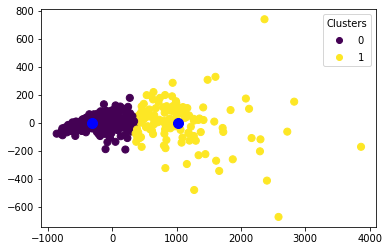

In [ ]:
# YOUR CODE HERE
sc = plt.scatter(principalDf['pc1'] ,principalDf['pc2'],c=y_kmeans_pca, s=50, cmap='viridis')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100,c='blue')     
legend1 = plt.legend(*sc.legend_elements(),loc="upper right", title="Clusters")                   
plt.show()

# Task 3: SVD (10 points)

Perform all the tasks you did in Task 2, just instead of PCA, use sklearn to perform [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), again with n = 2

In [ ]:
# YOUR CODE HERE
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd_c = svd.fit_transform(features)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)
SVDdf = pd.DataFrame(data = svd_c, columns = ['c1', 'c2'])
SVDdf

[0.97440781 0.02168862]
0.9960964378139727
[30786.44462784  2480.44578339]


,c1,c2
0,2241.974276,347.715560
1,2372.408403,56.901670
2,2101.840280,11.947627
3,697.432105,-2.127700
4,2047.087229,-137.765113
...,...,...
564,2522.499105,-17.637193
565,2153.721279,-21.425876
566,1424.532810,-55.021712
567,2231.655793,19.994399


In [ ]:
k_means = KMeans(n_clusters = 2)
k_means.fit(SVDdf)
y_kmeans_svd = k_means.predict(SVDdf)
print(y_kmeans_svd,'\n')
print(f'Silhouette Score(n=2): {silhouette_score(SVDdf,y_kmeans_svd )}')

[0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 

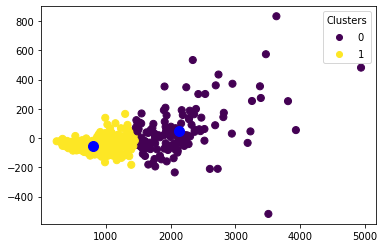

In [ ]:
sc = plt.scatter(SVDdf['c1'] ,SVDdf['c2'],c=y_kmeans_svd, s=50, cmap='viridis')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100,c='blue')     
legend1 = plt.legend(*sc.legend_elements(),loc="upper right", title="Clusters")                   
plt.show()

If you have done all the 3 tasks correctly, you should notice that the silhouette score for all 3 methods is almost the same. This is because we have restricted the number of clusters to two. And while there are binary labels, this dataset has 30 features, and breast cancer cases depend on a variable range of data, and hence splitting them into more clusters helps us learn more about the similarities in each cluster. 

Your last take focuses on that!

# Task 4: Comparative Analysis to Determine Best value of K (25 points)

For this entire section, use the original data before running any dimensionality reduction algorithms (features, labels).

Run k-means for ```k=2,3,4,5```, calculate the silhouette score and plot the data with the help of ```SilhouetteVisualizer``` from [yellowbricks](https://www.scikit-yb.org/en/latest/index.html). Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it’s using Matplotlib.

**HINT:** Read up about how the Silhouette plot should look, SilhouetteVisualizer is a very particular plot, which makes understanding the score and clusters intuitive.

The y-axis denotes the number of examples, and x-axis denotes the silhouette score for the various clusters with a line depiciting the average silhouette scores.

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer


0.6972646156059464


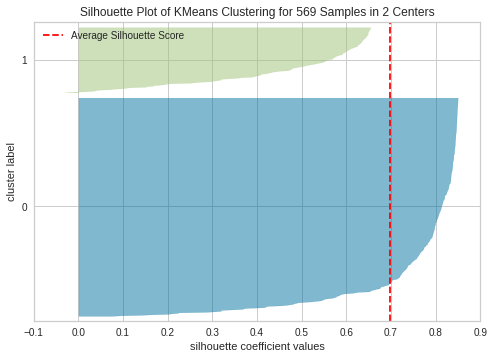

0.6695939093799408


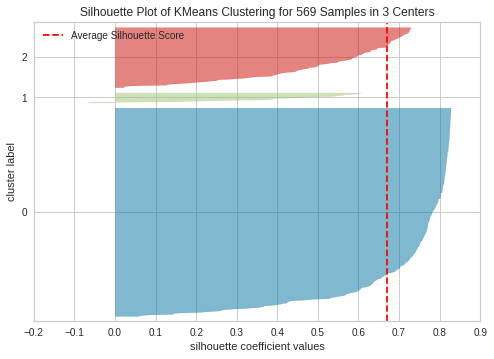

0.5334614737117133


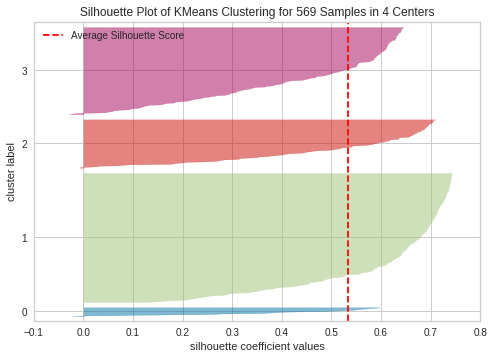

0.5102292997907838


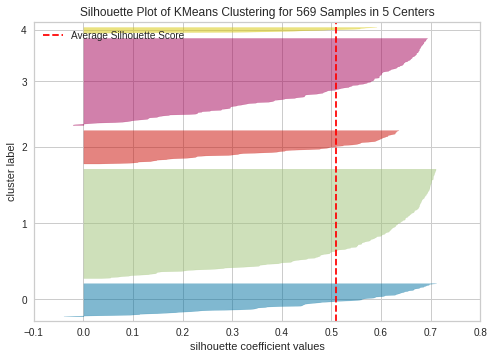

In [ ]:
# YOUR CODE HERE
k = [2,3,4,5]
SilhoutteScores = []
for k in k:
  k_means = KMeans(n_clusters = k)
  k_means.fit(features)
  y_kmeans = k_means.predict(features)
  SilhoutteScore = silhouette_score(features,y_kmeans )
  print(SilhoutteScore)
  SilhoutteScores.append(SilhoutteScore)
  visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')
  visualizer.fit(features) 
  visualizer.show() 

In [ ]:
print("\nSilhouetteScores:",SilhoutteScores)
print("Average Silhoutte Score:", mean(SilhoutteScores))


SilhouetteScores: [0.6972646156059464, 0.6695939093799408, 0.5334614737117133, 0.5102292997907838]
Average Silhoutte Score: 0.6026373246220961


Based on your 4 plots, write how many number of clusters is optimal and why?

Make sure your answer is based on reasoning covering the following points:


*   Average silhouette score
*   Thickness of silhouette plots for various clusters
*   Fluctuations in size of the silhouette plots




**ANSWER:**

In the visualizations for silhouette score for k= 2 and 3, it can be observed that not all clusters cross the average silhouette score line as a result of which k = 2 and k = 3 are not optimal values for the number of clusters, hence we disregard them. Taking about the silhouette score visualizations for k = 4 and k = 5, it can be observed that all the clusters cross the average silhouette score values and are somewhat properly distributed in terms of size. However the silhouette plot for k=4 has quite large variation in size of cluster 3 in comparison to other clusters. The silhouette plot for k=5 seems to be the optimal solution as they all cross the average silhouette score line, their thickness is properly distributed and similar in some plots also there is no major fluctuation in size of clusters. Hence, k = 5 is the optimal number of clusters among k=[2,3,4,5].

# Task 5: CUR Decomposition (30 points)

Implement CUR Decomposition for the ```features``` matrix. 


*   For matrix C and R use the Column Select Algorithm to choose the columns and rows for C and R respectively. 
*   For matrix U, find the intersection between the matrices C and R, and then find its pseudo-inverse using ```numpy.linalg.pinv```

Choose the rank to be 2. Hence the order of your matrices should be:


*   C: (569 X 2)
*   U: (2 X 2)
*   R: (2 X 30)





In [ ]:
from numpy.linalg import pinv as inv

# Defining the CUR Decomposition function:

def cur(matrix, rank):
    m = matrix.shape[0]
    n = matrix.shape[1]
    C = np.empty((m, rank)).T
    U = np.empty((rank, rank))
    R = np.empty((rank, n))
    selected_columns = []
    selected_rows = []
    col_sqsum = np.square(matrix).sum(axis=0)
    row_sqsum = np.square(matrix).sum(axis=1)
    total = sum(row_sqsum)
    P_col = col_sqsum / total
    P_row = row_sqsum / total
    for i in range(rank):
        j = random.randint(0, n - 1)
        selected_columns.append(j)
        C[i] = matrix.T[j] / np.sqrt(rank * P_col[j])
    for i in range(rank):
        j = random.randint(0, m - 1)
        selected_rows.append(j)
        R[i] = matrix[j] / np.sqrt(rank * P_row[j])
    print("Selected_columns:",selected_columns,"Selected_rows:",selected_rows)
    W = []
    for row in selected_rows:
      for col in selected_columns:
        W.append(matrix[row][col])
    W_np = np.array(W)
    W_np = W_np.reshape(rank,rank)
    u, s, vh = np.linalg.svd(W_np, full_matrices=True)
    x = np.diag(s)
    st = np.linalg.pinv(x)
    U = vh.T*(st**2)*(u.T)
    return C.T ,U, R

In [ ]:
#Performing CUR decomposition using the above defined function on features

C ,U, R = cur(features.to_numpy(),2)
print("C:\n",C)
print("Shape of Matrix C:",C.shape,"\n")
print("U:\n",U)
print("Shape of Matrix U:",U.shape,"\n")
print("R:\n",R)
print("Shape of Matrix R:",R.shape)

Selected_columns: [0, 4] Selected_rows: [296, 165]
C:
 [[1131.9640442  1113.86032408]
 [1294.30241185  797.20037046]
 [1238.93118568 1031.0734081 ]
 ...
 [1044.50267558  795.41292568]
 [1296.19006729 1108.21576163]
 [ 488.27353991  495.12220318]]
Shape of Matrix C: (569, 2) 

U:
 [[ 1.71639021e-03 -0.00000000e+00]
 [ 0.00000000e+00 -1.59095526e+03]]
Shape of Matrix U: (2, 2) 

R:
 [[4.37566651e+02 4.95320636e+02 2.77299342e+03 1.45868919e+04
  3.41630865e+00 1.89344836e+00 4.95721706e-01 5.49063928e-01
  5.81149475e+00 2.41884920e+00 7.03074555e+00 4.11898213e+01
  5.08154855e+01 4.44785899e+02 1.39491917e-01 4.89705665e-01
  4.29946334e-01 3.76724432e-01 1.17954493e+00 1.37486570e-01
  4.56015841e+02 5.94384763e+02 2.90454417e+03 1.57299396e+04
  3.73475770e+00 3.01042647e+00 1.15668398e+00 1.28101548e+00
  8.59491598e+00 2.66430363e+00]
 [3.10576601e+02 4.09952815e+02 1.98130029e+03 1.43193033e+04
  1.74707118e+00 1.11035803e+00 4.03936301e-01 4.02276573e-01
  3.14310989e+00 1.092515